# rs3 -> tree -> dis

# TODO: remove '_!' pre/suffix during dis->tree conversion

In [1]:
leaves = ['_!blah', 'blah', 'blah_!']

In [2]:
leaves[0] = leaves[0].lstrip('_!')
leaves[-1] = leaves[-1].rstrip('_!')

In [3]:
leaves

['blah', 'blah', 'blah']

In [4]:
import os
import discoursegraphs as dg
from discoursegraphs.readwrite.tree import t, is_leaf

In [5]:
# !ls *.rs3

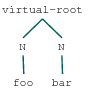

In [6]:
t1 = dg.read_rs3tree('foo-bar-only-segments.rs3')
t1

In [7]:
t1.pprint()

(virtual-root (N foo) (N bar))


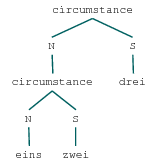

In [8]:
t2 = dg.read_rs3tree('eins-zwei-drei-(circ-(circ-eins-from-zwei)-from-drei).rs3')
t2

In [9]:
t2.pprint()

(circumstance (N (circumstance (N eins) (S zwei))) (S drei))


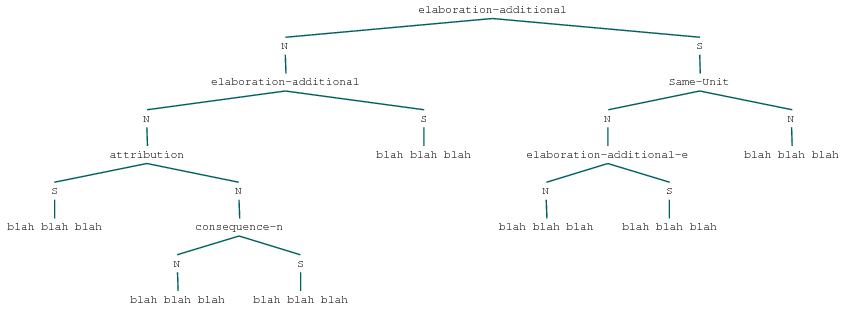

In [10]:
t3_filepath = os.path.join(dg.DATA_ROOT_DIR, 'rst-example1.dis')
t3 = dg.read_distree(t3_filepath)
t3

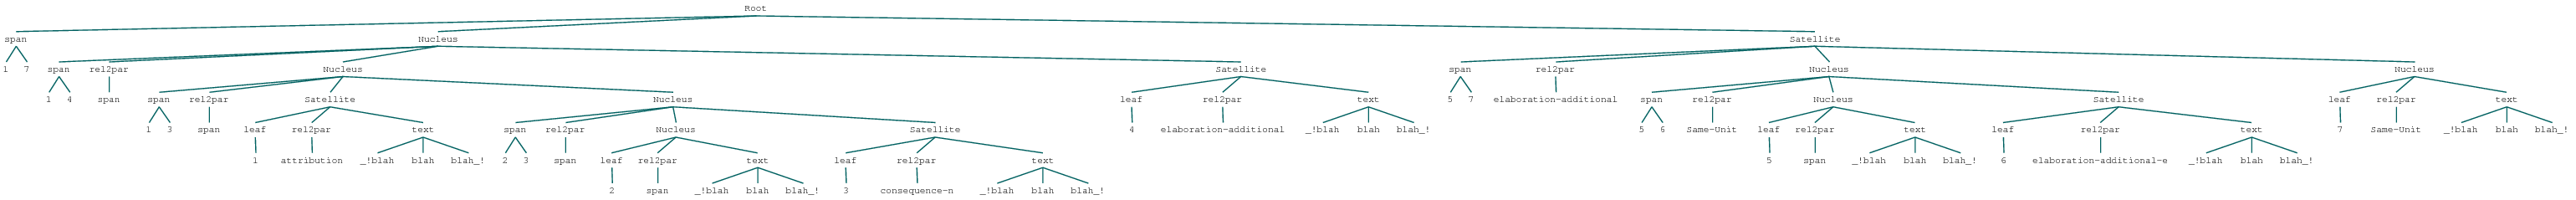

In [11]:
t3.disfile_tree

In [12]:
t3.disfile_tree.label()

'Root'

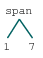

In [13]:
t3.disfile_tree[0]

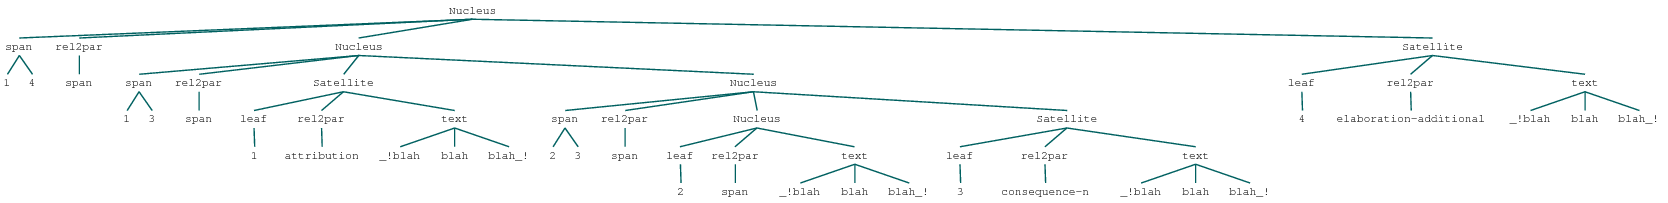

In [14]:
t3.disfile_tree[1]

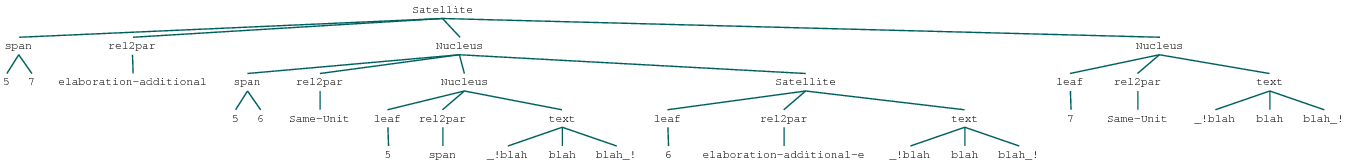

In [15]:
t3.disfile_tree[2]

In [16]:
t3.disfile_tree.parent()

In [17]:
type(t3)

discoursegraphs.readwrite.rst.dis.distree.DisRSTTree

In [18]:
type(t3.disfile_tree)

nltk.tree.ParentedTree

In [19]:
from nltk.tree import Tree

In [20]:
x1 = Tree('foo', [])
x1

In [21]:
def isroot(parented_tree):
    return hasattr(parented_tree, 'parent') and parented_tree.parent() is None

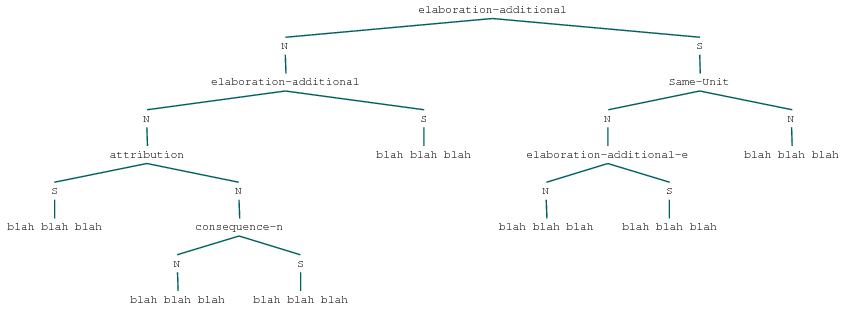

In [22]:
t3

In [23]:
isroot(t('foo', ['bar'])[0])

False

# TODO: get EDU IDs (must work for both full trees and subtrees)

In [24]:
for i, treepos in enumerate(t3.tree.treepositions('leaves'), 1):
    print(i, treepos)

(1, (0, 0, 0, 0, 0, 0))
(2, (0, 0, 0, 0, 1, 0, 0, 0))
(3, (0, 0, 0, 0, 1, 0, 1, 0))
(4, (0, 0, 1, 0))
(5, (1, 0, 0, 0, 0, 0))
(6, (1, 0, 0, 0, 1, 0))
(7, (1, 0, 1, 0))


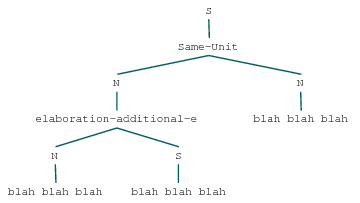

In [25]:
t3.tree[1]

In [26]:
t3.tree[1].treepositions('leaves')

[(0, 0, 0, 0, 0), (0, 0, 0, 1, 0), (0, 1, 0)]

In [27]:
t3.tree[1].root().treepositions('leaves')

[(0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 1, 0, 0, 0),
 (0, 0, 0, 0, 1, 0, 1, 0),
 (0, 0, 1, 0),
 (1, 0, 0, 0, 0, 0),
 (1, 0, 0, 0, 1, 0),
 (1, 0, 1, 0)]

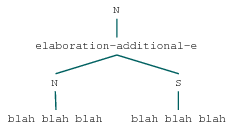

In [28]:
t3.tree[(1,0,0)]

In [29]:
x = t3.tree[(1,0,0)]
x.treeposition()

(1, 0, 0)

In [30]:
x.treepositions('leaves')

[(0, 0, 0), (0, 1, 0)]

In [31]:
(1,0,0) + (0,1,0)

(1, 0, 0, 0, 1, 0)

In [32]:
# for rel_leaf_pos in x.treepositions('leaves'):
#     print "rel pos: {}, abs pos: {}".format(rel_leaf_pos, x[rel_leaf_pos].treeposition())

In [33]:
all_leaves = t3.tree[1].root().treepositions('leaves')
subtree_leaves = t3.tree[1].treepositions('leaves')

In [34]:
subtree_leaves

[(0, 0, 0, 0, 0), (0, 0, 0, 1, 0), (0, 1, 0)]

In [35]:
all_leaves

[(0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 1, 0, 0, 0),
 (0, 0, 0, 0, 1, 0, 1, 0),
 (0, 0, 1, 0),
 (1, 0, 0, 0, 0, 0),
 (1, 0, 0, 0, 1, 0),
 (1, 0, 1, 0)]

In [36]:
def subtree_leaf_positions(subtree):
    """Return tree positions of all leaves of a subtree."""
    relative_leaf_positions = subtree.treepositions('leaves')
    subtree_root_pos = subtree.treeposition()
    absolute_leaf_positions = []
    for rel_leaf_pos in relative_leaf_positions:
        absolute_leaf_positions.append( subtree_root_pos + rel_leaf_pos)
    return absolute_leaf_positions

def all_leaf_positions(parented_tree):
    """Return tree positions of all leaves of a ParentedTree,
    even if the input is only a subtree of that ParentedTree.
    """
    return parented_tree.root().treepositions('leaves')

In [37]:
def make_span(parented_tree):
    """create a 'span' or 'leaf' subtree for dis/lisp/RST-DT-formatted trees.
    
    Examples:
           span     (a subtree that covers the leaves 1 to 7)
         ___|____   
        1        7 

        leaf        (a subtree that only covers leaf 7)
         |   
         7
    """
    all_leaves = all_leaf_positions(parented_tree)
    if isroot(parented_tree):
        return t('span', ['1', str(len(all_leaves))])
    
    subtree_leaves = subtree_leaf_positions(parented_tree)
    if len(subtree_leaves) == 1:
        edu_id = all_leaves.index(subtree_leaves[0]) + 1
        return t('leaf', [str(edu_id)])
    elif len(subtree_leaves) > 1:
        first_edu_id = all_leaves.index(subtree_leaves[0]) + 1
        last_edu_id = all_leaves.index(subtree_leaves[-1]) + 1
        return t('span', [str(first_edu_id), str(last_edu_id)])
    else:
        raise NotImplementedError('Subtree has no leaves')

In [38]:
make_span(t3.tree).pretty_print()

    span    
  ___|____   
 1        7 



In [39]:
make_span(t3.tree[1][0][1]).pretty_print()

leaf
 |   
 7  



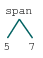

In [40]:
make_span(t3.tree[1][0])

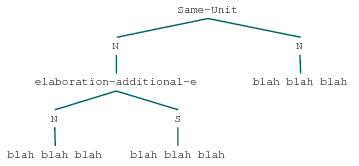

In [41]:
t3.tree[1][0]

(0, 0, 0)


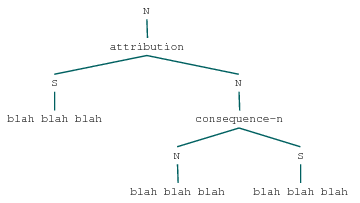

In [42]:
left = t3.tree[(0,0,0)]
print(left.treeposition())
left

(0, 0, 1)


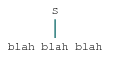

In [43]:
right = t3.tree[(0,0,1)]
print(right.treeposition())
right

In [44]:
right.treeposition()

(0, 0, 1)

In [45]:
left.treeposition()

(0, 0, 0)

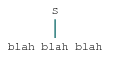

In [46]:
left.root()[right.treeposition()]

In [47]:
for child in t3.tree:
    print child.treeposition()

(0,)
(1,)


In [48]:
def get_siblings(parented_subtree):
    subtree_pos = parented_subtree.treeposition()
    parent = parented_subtree.parent()
    if parent is None:
        return []
    
    siblings = []
    for child in parent:
        child_pos = child.treeposition()
        if child_pos != subtree_pos:
            siblings.append(child_pos)
    return siblings

In [49]:
x = t3.tree[0,0,0]
print(get_siblings(x))
print(x)

[(0, 0, 1)]
(N
  (attribution
    (S blah blah blah)
    (N (consequence-n (N blah blah blah) (S blah blah blah)))))


In [50]:
def make_rel2par(nuc_or_sat_subtree):
    if isroot(nuc_or_sat_subtree):
        raise ValueError("Root node can't have a relation.")
    subtree_root_label = nuc_or_sat_subtree.label()
    parent_label = nuc_or_sat_subtree.parent().label()
    if subtree_root_label == 'S':
        return t('rel2par', [parent_label])
    elif subtree_root_label == 'N':
        siblings = get_siblings(nuc_or_sat_subtree)
        root = nuc_or_sat_subtree.root()
        sibling_labels = [root[sib].label() for sib in siblings]
        if len(siblings) == 1 and sibling_labels[0] == 'S':
            return t('rel2par', ['span'])
        elif all([label == 'N' for label in sibling_labels]):
            return t('rel2par', [parent_label])
        else:
            raise ValueError(
                "Can't mix sibling types. Expected 'N' or 'S', got: {}".format(sibling_labels))
    else:
        raise ValueError(
            "Unknown nuclearity. Expected 'N' or 'S', got: {}".format(subtree_root_label))

      N       
      |        
blah blah blah



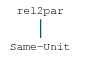

In [51]:
x = t3.tree[(1,0,1)]
x.pretty_print()
make_rel2par(x)

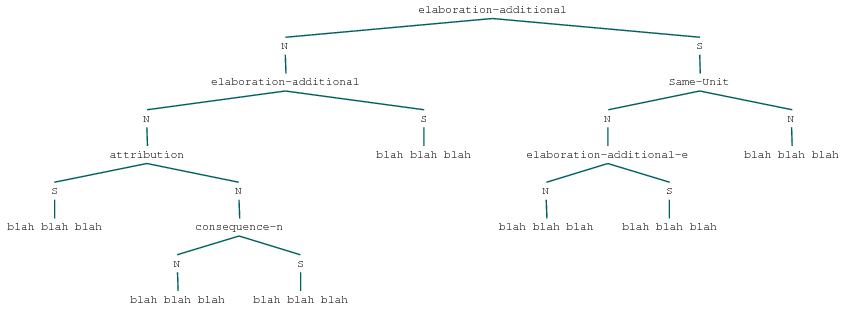

In [52]:
t3.tree

In [53]:
def make_edu(edu_string):
    tokens = edu_string.split()
    tokens[0] = u'_!' + tokens[0]
    tokens[-1] = tokens[-1] + u'_!'
    return t('text', tokens)

In [54]:
def get_nucsat_subtrees(parented_tree):
    """Return all direct children of the given tree, that are either
    a nucleus, satellite or a leaf node (i.e. all children except
    for relation nodes.)
    """
    if is_leaf(parented_tree):
        return [parented_tree]
    
    nucsat_children = []
    for child in parented_tree:
        if  is_leaf(child) or child.label() in ('N', 'S'):
            nucsat_children.append(child)
        else:
            nucsat_children.extend( get_nucsat_subtrees(child) )
    return nucsat_children

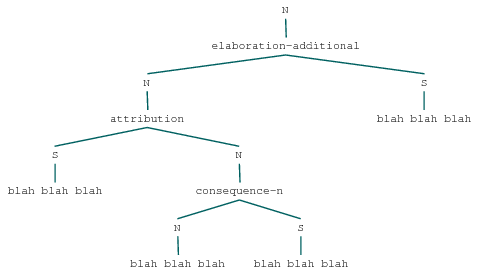

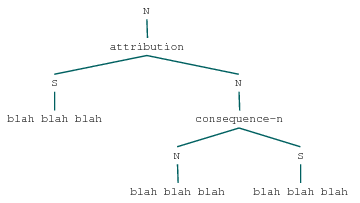

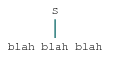

In [55]:
from IPython.display import Image, display

display(t3.tree[(0)])

for child in get_nucsat_subtrees(t3.tree[(0)]):
    display(child)

In [56]:
# def get_unparented_subtrees(parented_tree):
#     unparented_subtrees = []
#     for subtree in parented_tree:
#         subtree._parent = None
#         unparented_subtrees.append(subtree)
#     return unparented_subtrees

def orphanize(parented_subtree):
    if is_leaf(parented_subtree):
        return parented_subtree
    else:
        parented_subtree._parent = None
        return parented_subtree

def convert_label(label):
    if label == 'N':
        return 'Nucleus'
    elif label == 'S':
        return 'Satellite'
    else:
        return label

def convert(parented_tree):
    if isroot(parented_tree):
        span_description = make_span(parented_tree)
        children = [span_description]
        for subtree in get_nucsat_subtrees(parented_tree):
            children.append(convert(subtree))
        orphaned_children = [orphanize(child) for child in children]
        return t('Root', orphaned_children)
    elif is_leaf(parented_tree):
        return make_edu(parented_tree)
    else:
        span_description = make_span(parented_tree)
        rel_description = make_rel2par(parented_tree)
        children = [span_description, rel_description]
        for subtree in get_nucsat_subtrees(parented_tree):
            children.append(convert(subtree))
        tree_label = convert_label(parented_tree.label())
        orphaned_children = [orphanize(child) for child in children]
        return t(tree_label, orphaned_children)

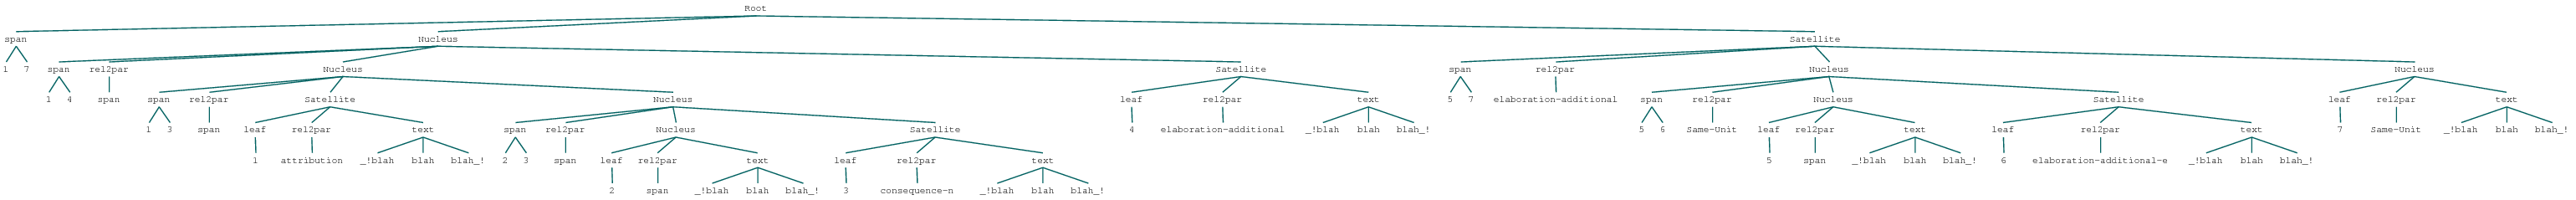

In [57]:
convert(t3.tree)

In [58]:
test1 = t3.tree[(0,0,0,0,0,0)]
test1

u'blah blah blah'

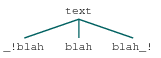

In [59]:
convert(test1) # OKAY

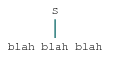

In [60]:
test2 = t3.tree[(0,0,0,0,0)]
test2

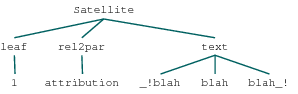

In [61]:
convert(test2) # OKAY

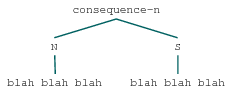

In [62]:
test3 = t3.tree[(0,0,0,0,1,0)]
test3

In [63]:
# convert(test3) # FAIL: ValueError: Unknown nuclearity. Expected 'N' or 'S', got: consequence-n

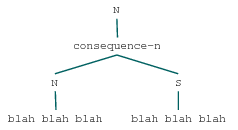

In [64]:
test4 = t3.tree[(0,0,0,0,1)]
test4

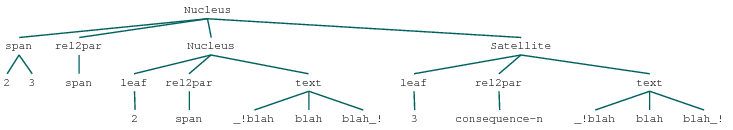

In [65]:
convert(test4) # OKAY

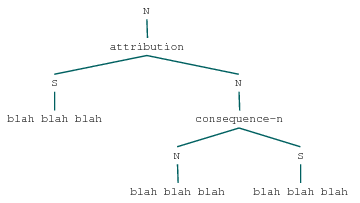

In [66]:
test5 = t3.tree[(0,0,0)]
test5

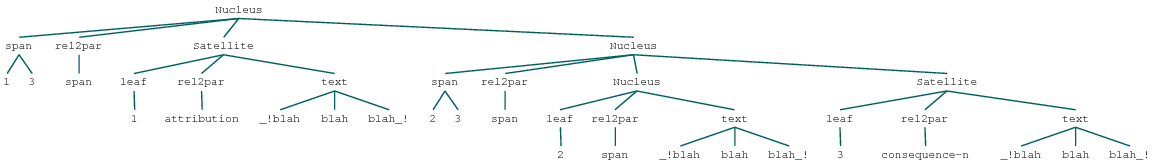

In [67]:
ctest5 = convert(test5)
ctest5

In [68]:
print convert(t3.tree)

(Root
  (span 1 7)
  (Nucleus
    (span 1 4)
    (rel2par span)
    (Nucleus
      (span 1 3)
      (rel2par span)
      (Satellite
        (leaf 1)
        (rel2par attribution)
        (text _!blah blah blah_!))
      (Nucleus
        (span 2 3)
        (rel2par span)
        (Nucleus (leaf 2) (rel2par span) (text _!blah blah blah_!))
        (Satellite
          (leaf 3)
          (rel2par consequence-n)
          (text _!blah blah blah_!))))
    (Satellite
      (leaf 4)
      (rel2par elaboration-additional)
      (text _!blah blah blah_!)))
  (Satellite
    (span 5 7)
    (rel2par elaboration-additional)
    (Nucleus
      (span 5 6)
      (rel2par Same-Unit)
      (Nucleus (leaf 5) (rel2par span) (text _!blah blah blah_!))
      (Satellite
        (leaf 6)
        (rel2par elaboration-additional-e)
        (text _!blah blah blah_!)))
    (Nucleus (leaf 7) (rel2par Same-Unit) (text _!blah blah blah_!))))


In [69]:
input_tree = dg.read_distree(os.path.join(dg.DATA_ROOT_DIR, 'rst-example1.dis'))

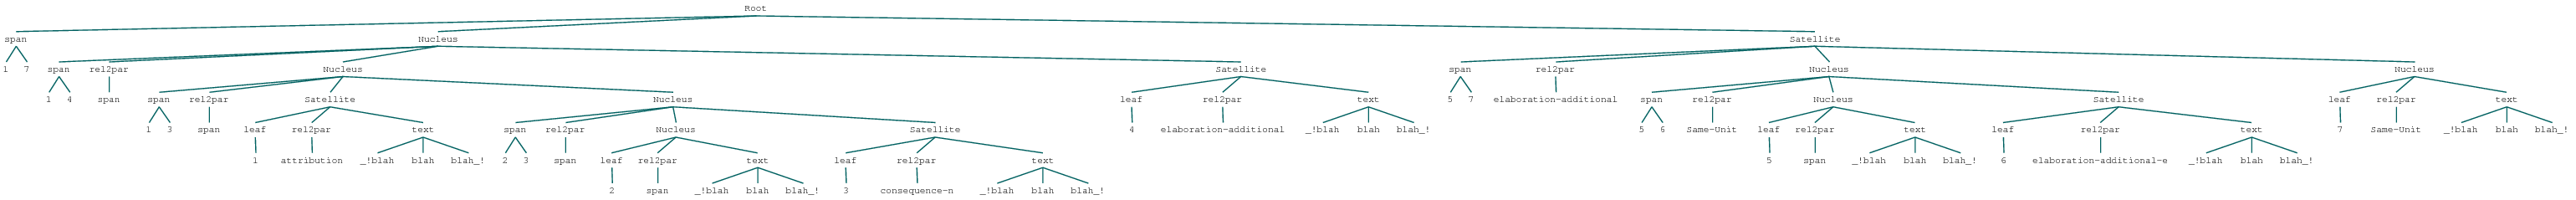

In [70]:
input_tree.disfile_tree

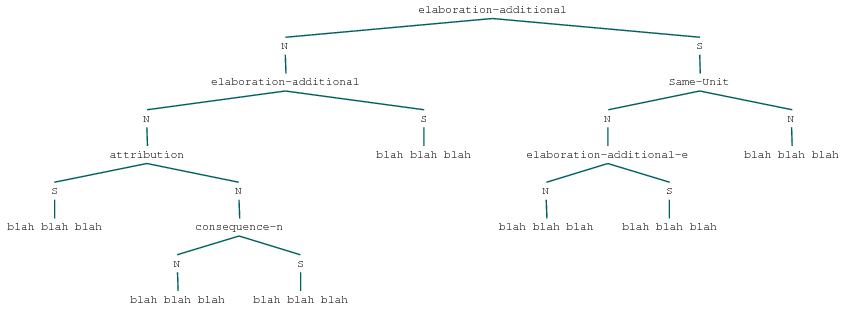

In [71]:
input_tree

# TODO: test dis -> tree -> dis -> tree

In [72]:
import glob

In [73]:
RSTDT_DIR = '/home/arne/corpora/rst_discourse_treebank/data/RSTtrees-WSJ-main-1.0/TRAINING/'
dis_files = glob.glob(os.path.join(RSTDT_DIR, '*.dis'))

In [74]:
for dis_file in dis_files:
    try:
        dg.read_distree(dis_file)
    except Exception as e:
        print(os.path.basename(dis_file), e)

('wsj_0681.out.dis', AssertionError("child_types: defaultdict(<type 'list'>, {'Satellite': [0, 2], 'Nucleus': [1]})",))
('wsj_1192.out.dis', AssertionError("child_types: defaultdict(<type 'list'>, {'Satellite': [0, 2], 'Nucleus': [1]})",))
('wsj_1138.out.dis', AssertionError("child_types: defaultdict(<type 'list'>, {'Satellite': [0, 2], 'Nucleus': [1]})",))
('wsj_1322.out.dis', AssertionError("child_types: defaultdict(<type 'list'>, {'Satellite': [0, 2], 'Nucleus': [1]})",))
('wsj_1377.out.dis', AssertionError("child_types: defaultdict(<type 'list'>, {'Satellite': [0, 2], 'Nucleus': [1]})",))
('wsj_1362.out.dis', AssertionError("child_types: defaultdict(<type 'list'>, {'Satellite': [0, 2], 'Nucleus': [1]})",))
('wsj_1355.out.dis', AssertionError("child_types: defaultdict(<type 'list'>, {'Satellite': [0, 2], 'Nucleus': [1]})",))
('wsj_1318.out.dis', AssertionError("child_types: defaultdict(<type 'list'>, {'Satellite': [0, 2], 'Nucleus': [1]})",))
('wsj_1170.out.dis', AssertionError("chi

# TODO: rename read/write_foo to read/write_foograph, iff read/write_footree exists

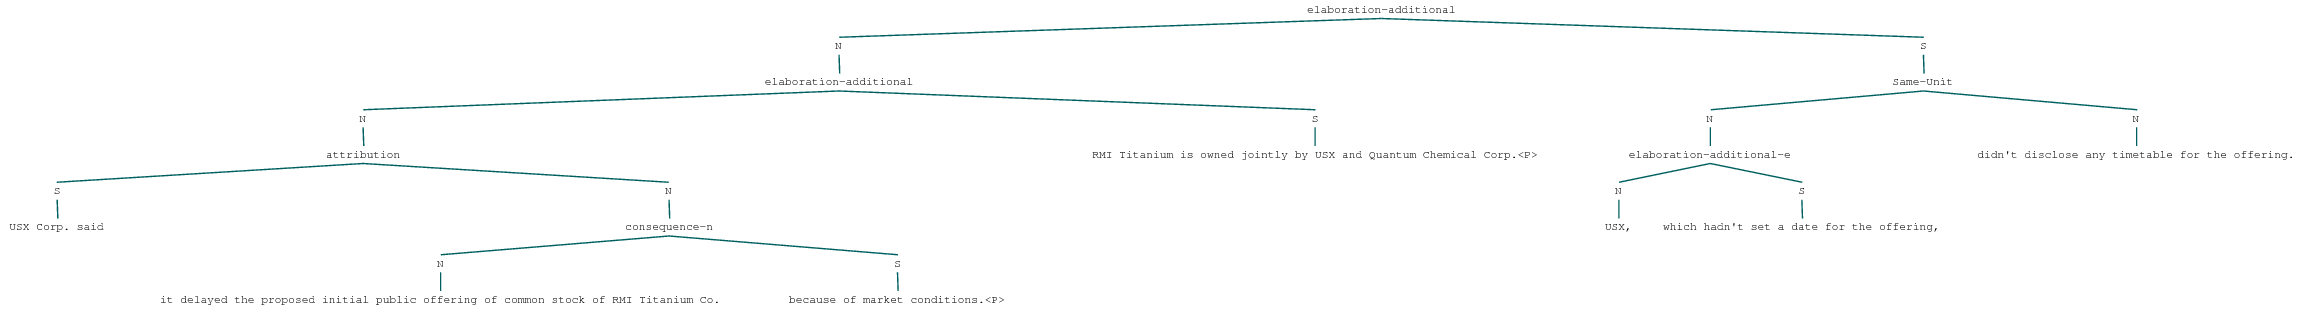

In [75]:
wsj_1115 = dg.read_distree(os.path.join(RSTDT_DIR, 'wsj_1115.out.dis'))
wsj_1115

In [76]:
dg.write_dis(wsj_1115)

NameError: global name 'DGParentedTree' is not defined